In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, jaccard_score
import numpy as np
import os
from PIL import Image
from shutil import copyfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_dir =  '/content/drive/MyDrive/BoneFractureDataset/training'
test_data_dir = '/content/drive/MyDrive/BoneFractureDataset/training'
validation_data_dir = '/content/drive/MyDrive/BoneFractureDataset/training'
IMG_WIDTH, IMG_HEIGHT = 299, 299
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen_augmented.flow_from_directory(train_data_dir, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=10, class_mode='categorical')

Found 1141 images belonging to 2 classes.


In [ ]:
test_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=8, class_mode='categorical', shuffle=False)

Found 1141 images belonging to 2 classes.


In [ ]:
validation_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=8, class_mode='categorical', shuffle=True)

Found 1141 images belonging to 2 classes.


In [ ]:
class_indices = train_generator.class_indices
print(class_indices)

{'fractured': 0, 'not_fractured': 1}


In [ ]:
classes = os.listdir(train_data_dir)
for class_name in classes:
    class_path = os.path.join(train_data_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_name}, Number of images: {num_images}")

Class: fractured, Number of images: 8
Class: not_fractured, Number of images: 1133


In [ ]:
batch = train_generator.next()
for i in range(len(batch[0])):
    img = batch[0][i]
    label = batch[1][i]
    height, width, channels = img.shape
    print(f"Image {i+1} - Shape: {width}x{height}x{channels}, Label: {label}")

Image 1 - Shape: 299x299x3, Label: [0. 1.]
Image 2 - Shape: 299x299x3, Label: [0. 1.]
Image 3 - Shape: 299x299x3, Label: [0. 1.]
Image 4 - Shape: 299x299x3, Label: [1. 0.]
Image 5 - Shape: 299x299x3, Label: [0. 1.]
Image 6 - Shape: 299x299x3, Label: [0. 1.]
Image 7 - Shape: 299x299x3, Label: [0. 1.]
Image 8 - Shape: 299x299x3, Label: [0. 1.]
Image 9 - Shape: 299x299x3, Label: [0. 1.]
Image 10 - Shape: 299x299x3, Label: [0. 1.]


In [ ]:
classes = os.listdir(test_data_dir)
for class_name in classes:
    class_path = os.path.join(test_data_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_name}, Number of images: {num_images}")

Class: fractured, Number of images: 8
Class: not_fractured, Number of images: 1133


In [ ]:
batch = test_generator.next()
for i in range(len(batch[0])):
    img = batch[0][i]
    label = batch[1][i]
    height, width, channels = img.shape
    print(f"Image {i+1} - Shape: {width}x{height}x{channels}, Label: {label}")

Image 1 - Shape: 299x299x3, Label: [1. 0.]
Image 2 - Shape: 299x299x3, Label: [1. 0.]
Image 3 - Shape: 299x299x3, Label: [1. 0.]
Image 4 - Shape: 299x299x3, Label: [1. 0.]
Image 5 - Shape: 299x299x3, Label: [1. 0.]
Image 6 - Shape: 299x299x3, Label: [1. 0.]
Image 7 - Shape: 299x299x3, Label: [1. 0.]
Image 8 - Shape: 299x299x3, Label: [1. 0.]


In [ ]:
classes = os.listdir(validation_data_dir)
for class_name in classes:
    class_path = os.path.join(validation_data_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_name}, Number of images: {num_images}")

Class: fractured, Number of images: 8
Class: not_fractured, Number of images: 1133


In [ ]:
batch = validation_generator.next()
for i in range(len(batch[0])):
    img = batch[0][i]
    label = batch[1][i]
    height, width, channels = img.shape
    print(f"Image {i+1} - Shape: {width}x{height}x{channels}, Label: {label}")

Image 1 - Shape: 299x299x3, Label: [0. 1.]
Image 2 - Shape: 299x299x3, Label: [0. 1.]
Image 3 - Shape: 299x299x3, Label: [0. 1.]
Image 4 - Shape: 299x299x3, Label: [0. 1.]
Image 5 - Shape: 299x299x3, Label: [0. 1.]
Image 6 - Shape: 299x299x3, Label: [0. 1.]
Image 7 - Shape: 299x299x3, Label: [0. 1.]
Image 8 - Shape: 299x299x3, Label: [0. 1.]


In [ ]:
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT available")
if tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
    print("GPU device configured")
else:
    print("No GPU device found")

GPU is NOT available
No GPU device found


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_dir = '/kaggle/working/Checkpoints_densenet201'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
checkpoint_path = model_dir + '/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

In [ ]:
checkpoint_path

'/kaggle/working/Checkpoints_densenet201/cp.ckpt'

In [ ]:
from tensorflow.keras import models, layers, optimizers

In [ ]:
def create_model(summary=True):
    new_input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=new_input)
    flat1 = Flatten()(base_model.layers[-1].output)
    output = Dense(2, activation='softmax')(flat1)
    model = Model(inputs=base_model.inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    if summary:
        print(model.summary())
    return model

In [ ]:
model = create_model()

74836368/74836368 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 305, 305, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 150, 150, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  

In [ ]:
history = model.fit(train_generator, steps_per_epoch=20, epochs=20, validation_data=validation_generator, validation_steps=25, callbacks=[cp_callback])
evaluation = model.evaluate(train_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 0.9500 - accuracy: 0.9900 
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /kaggle/working/Checkpoints_densenet201/cp.ckpt
20/20 [==============================] - 454s 23s/step - loss: 0.9500 - accuracy: 0.9900 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9850 
Epoch 2: val_accuracy did not improve from 1.00000
20/20 [==============================] - 435s 22s/step - loss: 0.0617 - accuracy: 0.9850 - val_loss: 11822.7178 - val_accuracy: 0.9850
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9900 
Epoch 3: val_accuracy did not improve from 1.00000
20/20 [==============================] - 431s 22s/step - loss: 0.0677 - accuracy: 0.9900 - val_loss: 133.2602 - val_accuracy: 0.9850
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9900

In [ ]:
initial_epoch = 0
saved_history = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy'],
}

In [ ]:
np.save("/kaggle/working/saved_D201history.npy", saved_history)

In [ ]:
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
print(latest_checkpoint)
if latest_checkpoint is not None:
    loaded_model = create_model(summary=True)
    status = loaded_model.load_weights(latest_checkpoint)
    status.expect_partial()
else:
    print("No checkpoint file found in the specified directory.")

/kaggle/working/Checkpoints_densenet201/cp.ckpt
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 305, 305, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 150, 150, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 150, 150

In [ ]:
previous_history = np.load("/kaggle/working/saved_D201history.npy", allow_pickle=True).item()
initial_epoch = len(previous_history['loss'])
print(initial_epoch)

20


In [ ]:
loaded_model.compile(optimizer=Adam(learning_rate=1e-5), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
new_history  = loaded_model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    initial_epoch=initial_epoch,
    validation_data=validation_generator,
    validation_steps=30,
    callbacks=[cp_callback]
)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

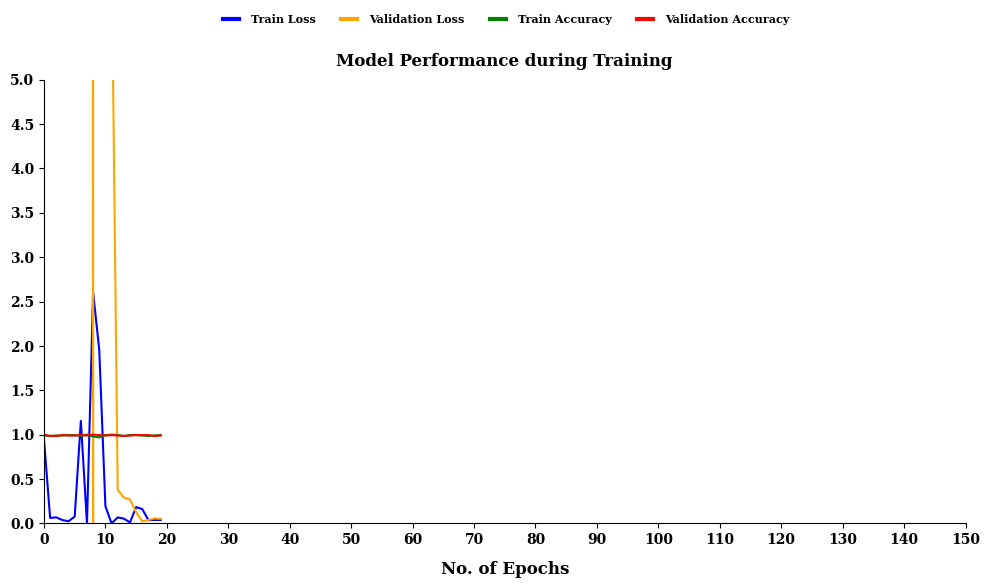

In [ ]:
plt.figure(figsize=(10, 6))
train_loss, = plt.plot(previous_history['loss'], label='Train Loss', color='blue')
val_loss, = plt.plot(previous_history['val_loss'], label='Validation Loss', color='orange')
train_accuracy, = plt.plot(previous_history['accuracy'], label='Train Accuracy',  color='green')
val_accuracy, = plt.plot(previous_history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Model Performance during Training', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12},pad=10)
plt.xlabel('No. of Epochs', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
plt.xticks(np.linspace(0, 150, num=16), fontname='Serif', weight='bold')
plt.yticks(np.linspace(0, 5, num=11), fontname='Serif', weight='bold')
plt.xlim(0, 150)
plt.ylim(0, 5)
legend_lines = [
    Line2D([0], [0], color='blue', lw=3),
    Line2D([0], [0], color='orange', lw=3),
    Line2D([0], [0], color='green', lw=3),
    Line2D([0], [0], color='red', lw=3)
]
plt.legend(legend_lines, ['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy'],
           loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=5,
           prop={'family': 'Serif', 'weight': 'bold', 'size': 8}, frameon=False,
           handler_map={Line2D: HandlerLine2D(numpoints=5)})
plt.gca().xaxis.labelpad = 10
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
print(checkpoint_dir)
if latest_checkpoint is not None:
    loaded_model = create_model(summary=True)
    status = loaded_model.load_weights(latest_checkpoint)
    status.expect_partial()
else:
    print("No checkpoint file found in the specified directory.")

/kaggle/working/Checkpoints_densenet201
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 305, 305, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 150, 150, 64)         9408      ['zero_padding2d_4[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 150, 150, 64)   

In [ ]:
loaded_model.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
test_loss, test_acc = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

143/143 [==============================] - 452s 3s/step - loss: 129141.1016 - accuracy: 0.9930
Test Accuracy: 0.9929885864257812


In [ ]:
%whos

Variable                       Type                    Data/Info
----------------------------------------------------------------
Adam                           type                    <class 'keras.src.optimizers.adam.Adam'>
Conv2D                         type                    <class 'keras.src.layers.<...>olutional.conv2d.Conv2D'>
Dense                          type                    <class 'keras.src.layers.core.dense.Dense'>
DenseNet121                    function                <function DenseNet121 at 0x7d6dc1195750>
DenseNet169                    function                <function DenseNet169 at 0x7d6dc11957e0>
DenseNet201                    function                <function DenseNet201 at 0x7d6dc1195870>
Dropout                        type                    <class 'keras.src.layers.<...>ization.dropout.Dropout'>
Flatten                        type                    <class 'keras.src.layers.<...>shaping.flatten.Flatten'>
GlobalAveragePooling2D         type                   

In [ ]:
true_classes = [1, 0, 1, 1, 0]
predicted_classes = [1, 1, 0, 1, 0]
print(f"Accuracy: {accuracy_score(true_classes, predicted_classes)}")
print(f"Precision: {precision_score(true_classes, predicted_classes)}")
print(f"Recall: {recall_score(true_classes, predicted_classes)}")
print(f"F1 Score: {f1_score(true_classes, predicted_classes)}")
print(f"Log Loss: {log_loss(true_classes, predicted_classes)}")
print(f"Jaccard Score: {jaccard_score(true_classes, predicted_classes)}")

Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
Log Loss: 14.41746135564686
Jaccard Score: 0.5


In [ ]:
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes,digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.5000    0.5000    0.5000         2
           1     0.6667    0.6667    0.6667         3

    accuracy                         0.6000         5
   macro avg     0.5833    0.5833    0.5833         5
weighted avg     0.6000    0.6000    0.6000         5



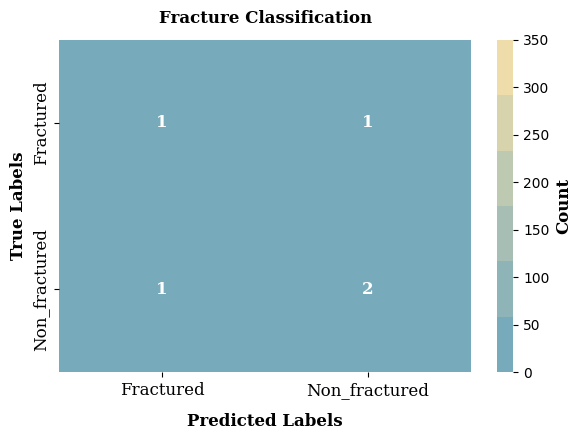

In [ ]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(6, 4.5))
custom_palette = sns.color_palette(palette='blend:#7AB,#EDA')
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette,vmin=0,vmax=350,
                      xticklabels=['Fractured', 'Non_fractured'], yticklabels=['Fractured', 'Non_fractured'],annot_kws={"family": "Serif",'weight': 'bold', 'size': 12})
heatmap.set_xlabel('Predicted Labels', fontdict=font)
heatmap.set_ylabel('True Labels', fontdict=font)
heatmap.set_title('Fracture Classification', fontdict=font, pad=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Count', fontdict=font)
cbar.ax.tick_params(labelsize=10)
plt.gca().xaxis.labelpad = 10
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

In [ ]:
print(type(true_classes))
print(type(predictions))

<class 'NoneType'>
<class 'NoneType'>


In [ ]:
!pip install scikit-learn
!pip install matplotlib

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
print(type(predictions))

<class 'ellipsis'>


In [ ]:
predictions = np.array(predictions)

In [ ]:
def save_and_display_gradcam(img_path, heatmap, alpha=0.7):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_PLASMA)
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('GradCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

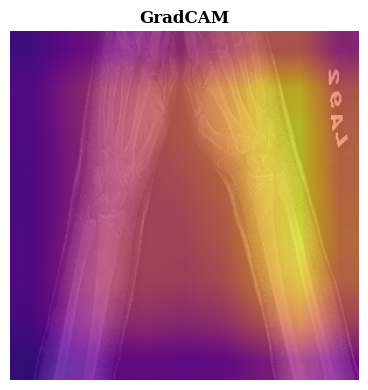

In [ ]:
def make_prediction_and_visualize_():
    img_path = '/content/drive/MyDrive/BoneFractureDataset/testing/fractured/3.jpg'
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    rescaled_img = img/255.0
    batch_pred = np.expand_dims(rescaled_img, 0)
    last_conv_layer_name = 'conv5_block32_concat'
    heatmap = make_gradcam_heatmap(batch_pred, loaded_model, last_conv_layer_name)
    save_and_display_gradcam(img_path, heatmap)
make_prediction_and_visualize_()

In [ ]:
def save_and_display_gradcam_plusplus(img_path, heatmap, alpha=0.7):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_PLASMA)
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('GradCAM++', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def make_gradcam_plusplus_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_output = preds[:, pred_index]
        conv_output = last_conv_layer_output[0]
    grads = tape.gradient(class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads[0], axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    guided_grads = tf.cast(last_conv_layer_output > 0, 'float32') * grads[0]
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    heatmap = tf.reduce_sum(tf.multiply(weights, last_conv_layer_output), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

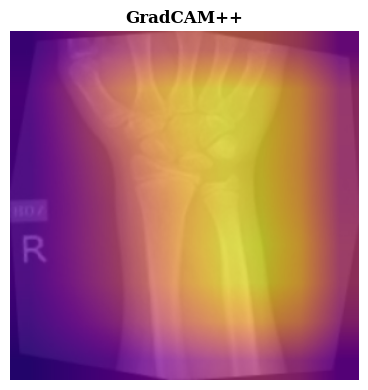

In [ ]:
def make_prediction_and_visualize_gradcam_plusplus():
    img_path = '/content/drive/MyDrive/testing/not_fractured/1-rotated1-rotated1-rotated1-rotated1.jpg'
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    rescaled_img = img / 255.0
    batch_pred = np.expand_dims(rescaled_img, 0)
    last_conv_layer_name = 'conv5_block32_concat'
    heatmap = make_gradcam_plusplus_heatmap(batch_pred, loaded_model, last_conv_layer_name)
    save_and_display_gradcam_plusplus(img_path, heatmap)
make_prediction_and_visualize_gradcam_plusplus()

In [ ]:
def save_and_display_scorecam(img_path, heatmap, alpha=0.7):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_PLASMA)
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('ScoreCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import tensorflow as tf
def make_scorecam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_output = preds[:, pred_index]
        conv_output = last_conv_layer_output[0]
    grads = tape.gradient(class_output, last_conv_layer_output)
    guided_grads = tf.cast(grads[0] > 0, 'float32') * grads[0]
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, conv_output), axis=-1)
    cam = tf.maximum(cam, 0)
    cam /= tf.reduce_max(cam)
    return cam.numpy()

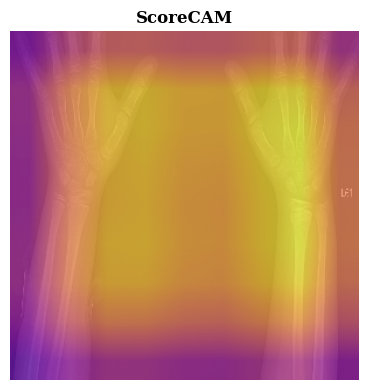

In [ ]:
def make_prediction_and_visualize_scorecam():
    img_path = '/content/drive/MyDrive/BoneFractureDataset/training/fractured/10.jpg'
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    rescaled_img = img/255.0
    batch_pred = np.expand_dims(rescaled_img, 0)
    last_conv_layer_name = 'conv5_block32_concat'
    heatmap = make_scorecam_heatmap(batch_pred, loaded_model, last_conv_layer_name)
    save_and_display_scorecam(img_path, heatmap)
make_prediction_and_visualize_scorecam()

In [ ]:
def save_and_display_faster_scorecam(img_path, heatmap, alpha=0.7):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_PLASMA)
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Faster ScoreCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def faster_scorecam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_output = preds[:, pred_index]
        conv_output = last_conv_layer_output[0]
    grads = tape.gradient(class_output, last_conv_layer_output)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))
    weights = tf.reshape(weights, (1, 1, -1))
    conv_output = tf.expand_dims(conv_output, axis=0)
    conv_output = tf.expand_dims(conv_output, axis=-1)
    cam = tf.matmul(weights, conv_output)
    cam = tf.squeeze(cam)
    cam = tf.maximum(cam, 0)
    cam /= tf.reduce_max(cam)
    return cam.numpy()

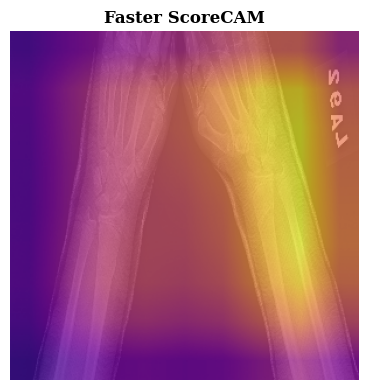

In [ ]:
def make_prediction_and_visualize_faster_scorecam():
    img_path = '/content/drive/MyDrive/BoneFractureDataset/testing/fractured/3.jpg'
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    rescaled_img = img/255.0
    batch_pred = np.expand_dims(rescaled_img, 0)
    last_conv_layer_name = 'conv5_block32_concat'
    heatmap = faster_scorecam_heatmap(batch_pred, loaded_model, last_conv_layer_name)
    save_and_display_faster_scorecam(img_path, heatmap)
make_prediction_and_visualize_faster_scorecam()

In [ ]:
def save_and_display_layercam(img_path, heatmap, alpha=0.7):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_PLASMA)
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('LayerCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import tensorflow as tf
def generate_layercam_heatmap(img_array, model, last_conv_layer_name, target_class_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if target_class_index is None:
            target_class_index = tf.argmax(preds[0])
        class_output = preds[:, target_class_index]
        conv_output = last_conv_layer_output[0]
    grads = tape.gradient(class_output, last_conv_layer_output)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))
    weights = tf.reshape(weights, (1, 1, -1))
    conv_output = tf.expand_dims(conv_output, axis=0)
    conv_output = tf.expand_dims(conv_output, axis=-1)
    cam = tf.matmul(weights, conv_output)
    cam = tf.squeeze(cam)
    cam = tf.maximum(cam, 0)
    cam /= tf.reduce_max(cam)
    return cam.numpy()

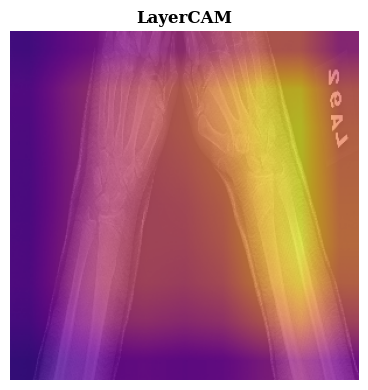

In [ ]:
def make_prediction_and_visualize_layercam():
    img_path = '/content/drive/MyDrive/BoneFractureDataset/testing/fractured/3.jpg'
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    rescaled_img = img/255.0
    batch_pred = np.expand_dims(rescaled_img, 0)
    last_conv_layer_name = 'conv5_block32_concat'
    heatmap = generate_layercam_heatmap(batch_pred, loaded_model, last_conv_layer_name)
    save_and_display_layercam(img_path, heatmap)
make_prediction_and_visualize_layercam()

In [ ]:
def save_and_display_saliency_map(img_path, saliency_map):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    saliency_map = cv2.resize(saliency_map, (img.shape[1], img.shape[0]))
    saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())
    heatmap = cv2.applyColorMap(np.uint8(255 * saliency_map), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    alpha = 0.4
    blended = cv2.addWeighted(img, alpha, heatmap, 1 - alpha, 0)
    plt.figure(figsize=(4, 4))
    plt.imshow(blended)
    plt.title('Vanilla Saliency', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def generate_vanilla_saliency_map(img_array, model):
    img_tensor = tf.convert_to_tensor(img_array)
    img_tensor = tf.expand_dims(img_tensor, axis=0)
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        preds = model(img_tensor)
        top_pred_index = tf.argmax(preds[0])
        top_class_score = preds[:, top_pred_index]
    grads = tape.gradient(top_class_score, img_tensor)
    saliency_map = tf.abs(grads)
    saliency_map = tf.reduce_max(saliency_map, axis=-1)
    return saliency_map[0].numpy()

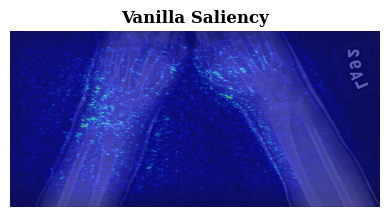

In [ ]:
def make_prediction_and_visualize_vanilla_saliency():
    img_path = '/content/drive/MyDrive/BoneFractureDataset/testing/fractured/3.jpg'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img / 255.0
    saliency_map = generate_vanilla_saliency_map(img, loaded_model)
    save_and_display_saliency_map(img_path, saliency_map)
make_prediction_and_visualize_vanilla_saliency()

In [ ]:
def save_and_display_SmoothGrad(img_path, saliency_map):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    saliency_map = cv2.resize(saliency_map, (img.shape[1], img.shape[0]))
    saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())
    heatmap = cv2.applyColorMap(np.uint8(255 * saliency_map), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    alpha = 0.4
    blended = cv2.addWeighted(img, alpha, heatmap, 1 - alpha, 0)
    plt.figure(figsize=(4, 4))
    plt.imshow(blended)
    plt.title('Smooth Grad', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def generate_smoothgrad_saliency_map(img_array, model, n=50, sigma=1.0):
    img_tensor = tf.convert_to_tensor(img_array)
    img_tensor = tf.expand_dims(img_tensor, axis=0)
    img_tensor = tf.cast(img_tensor, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        preds = model(img_tensor)
        top_pred_index = tf.argmax(preds[0])
        top_class_score = preds[:, top_pred_index]
    total_gradients = tf.zeros_like(img_tensor)
    for _ in range(n):
        noise = tf.random.normal(shape=img_tensor.shape, mean=0.0, stddev=sigma)
        perturbed_img = img_tensor + noise
        with tf.GradientTape() as perturbed_tape:
            perturbed_tape.watch(perturbed_img)
            perturbed_preds = model(perturbed_img)
            perturbed_top_class_score = perturbed_preds[:, top_pred_index]
        perturbed_grads = perturbed_tape.gradient(perturbed_top_class_score, perturbed_img)
        total_gradients += perturbed_grads
    averaged_gradients = total_gradients / n
    saliency_map = tf.abs(averaged_gradients)
    saliency_map = tf.reduce_max(saliency_map, axis=-1)
    return saliency_map[0].numpy()

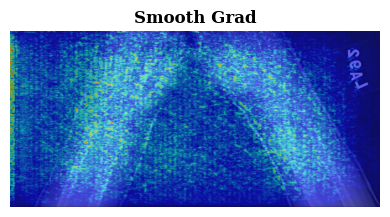

In [ ]:
def make_prediction_and_visualize_smoothgrad_saliency():
    img_path = '/content/drive/MyDrive/BoneFractureDataset/testing/fractured/3.jpg'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img / 255.0
    heatmap = generate_smoothgrad_saliency_map(img, loaded_model)
    save_and_display_SmoothGrad(img_path, heatmap)
make_prediction_and_visualize_smoothgrad_saliency()